In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from yellowbrick.regressor import ResidualsPlot, PredictionError

%matplotlib inline

In [2]:
# read in csv exported from notebook 1
df = pd.read_csv('SA17A-contr.csv', index_col=0)

In [3]:
# check datatypes
df.dtypes

cand_nm               object
contbr_city           object
contbr_zip             int64
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
form_tp               object
tran_id               object
election_tp           object
dtype: object

In [16]:
# convert zip to 5 num string
df['contbr_zip'] = df.contbr_zip.astype('str')
df.contbr_zip = df['contbr_zip'].apply(lambda x: x[0:5])
len(df.contbr_zip.unique()) # 48 unique zip codes 

48

In [8]:
# convert receipt date to datetime format and then add second column called converted_date
df.contb_receipt_dt = pd.to_datetime(df.contb_receipt_dt)
df['converted_date'] = df.contb_receipt_dt.map(lambda x: 100*x.year + x.month)
df['payment_yr'] = df.contb_receipt_dt.map(lambda x: x.year)
df.head()

,cand_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp,converted_date,payment_yr
0,"Trump, Donald J.",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016,201612,2016
23,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020,201801,2018
26,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020,201804,2018
29,"Trump, Donald J.",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020,201712,2017
41,"Trump, Donald J.",WASHINGTON,20007,CADWALADER,ATTORNEY,-2700.0,2017-01-20,SA17A,SA17A.445455,G2016,201701,2017


In [10]:
# filter out negative values
df = df.loc[df.contb_receipt_amt > 0]
df.min()

cand_nm               Biden, Joseph R Jr
contbr_city                   WASHINGTON
contbr_zip                         20001
contbr_employer                &PARTNERS
contbr_occupation                 (NULL)
contb_receipt_amt                   0.01
contb_receipt_dt     2016-11-09 00:00:00
form_tp                            SA17A
tran_id                         10001652
election_tp                        G2016
converted_date                    201611
payment_yr                          2016
dtype: object

In [ ]:
outcome = 'cand_nm' # or outcome = cand_val
x_numeric = ['contb_receipt_amt', 'converted_date', 'payment_yr']
x_cat = ['contbr_zip']

In [17]:
# drop the max contb receipt amount from trump of $41K
df = df.drop(df['contb_receipt_amt'].idxmax())

In [18]:
# dropped biden's max value of 15K
df = df.drop(df['contb_receipt_amt'].idxmax())
df.describe()

,contb_receipt_amt,converted_date,payment_yr
count,11943.000000,11943.000000,11943.000000
mean,212.916791,201904.844093,2018.981412
std,512.995820,17.802188,0.177412
min,0.010000,201611.000000,2016.000000
25%,25.000000,201905.000000,2019.000000
50%,50.000000,201907.000000,2019.000000
75%,100.000000,201908.000000,2019.000000
max,5600.000000,201909.000000,2019.000000


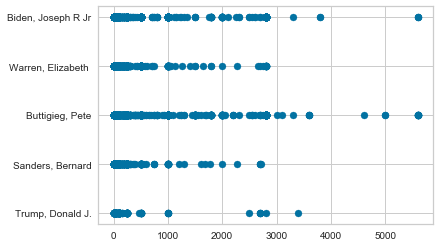

In [20]:
plt.scatter(df.contb_receipt_amt, df.cand_nm)
plt.show()

## Label Encoding by Candidate Name

In [ ]:
y = df['cand_nm']
le = LabelEncoder()
y_cand_nm = le.fit_transform(y)

In [ ]:
df['cand_label'] = y_cand_nm

## Splitting The Training and Testing Datasets

In [ ]:
X = df.contb_receipt_amt.values.reshape(-1, 1)
y = df.cand_label

# We're going to split the train and test data and stratify by candidate name
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, stratify=y, test_size=.2)


## Checking for Linear Relationship & Multicollinearity

Most values are categorical. As a test we're just looking at the candidate value(party) and the receipt amount. Pearson's R in this case is negative. 

No reason to look for VIF according to the result.

In [ ]:
#most values are categorical, as a test we're just looking at the candidate value(party) and the receipt amount
df.corr()

## Logistic Regression

In [ ]:
# preliminary logistic regression
lr = LogisticRegression(C=1e9, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(12,10))
y_train_predict = lr.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_predict, color='red')
plt.xlabel('$ Amount')
plt.ylabel('Candidate')

In [ ]:
lr.score(X_train, y_train)

In [ ]:
# label encoder
# one versus rest; one versus one (costly)
# read in scikit learn
# linear models are sensitive to outliers; default is not always dropping outliers
# where is threshold?
# don't include Delaware in DC-only data; they are noise; extreme values are noise
# extreme values are illegal; can work only in legal values
# standardized outlier test ( p. 97)
# what do we do with the zip codes? Don't make it 50 different columns.
# penalization (L1 and L2) requires penalization
# when do you do scaling? scale it in the train and apply to the test
# sparse data set; many zeros and few ones
# go through everything very systematically and report everything

In [ ]:
def convert_label(y_series): 
    for y in y_series:
        if y == 3:
            label = 1
        else:
            label = 0 
    return label


In [ ]:
outcome = 'cand_nm' # or outcome = cand_val
x_numeric = ['contb_receipt_amt', 'converted_date', 'payment_yr']
x_cat = ['contbr_zip']